# Class Workbook

## In class activity

In [1]:
import numpy as np
import pandas as pd
import math
#import statsmodels.api as sm
from plotnine import *
import statsmodels.formula.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize ,poly)

### Ames House Data

In [2]:
ames_raw=pd.read_csv("ames_raw.csv")

Let's revisit the AmesHousing data.  As we did in the previous class, I will split the data into before 2008 and after.  The data up to 2008 will be the training data and after 2008 will be the testing data.

In [3]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

* For the regression model fit, use bootstrap to compare the standard error estimates to the model based estimates.


Your code:

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


dependent_var = 'SalePrice'
independent_vars = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Year Built']

X_train = ames_raw_2008[independent_vars].fillna(0)  # Handling missing values by replacing them with 0
y_train = ames_raw_2008[dependent_var]
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Model-based standard errors
model_based_std_errors = model.bse
model_based_std_errors



const            91269.877585
Overall Qual      1203.084121
Gr Liv Area          2.698992
Total Bsmt SF        3.059365
Garage Cars       1903.531560
Year Built          48.011805
dtype: float64

Your answer:

~~~
The bootstrap standard errors are quite close to the model-based standard errors, indicating consistency in the estimates. This consistency suggests that the model-based standard errors are reliable for the given data and model.


~~~


* Use cross validation  to decide which model has a good predictive accuracy.  Does the result hold true for the prediction of future data?

Your code:

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Initialize models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet()
}

# Cross-validation settings
k = 5  # Number of folds
scoring = 'neg_mean_squared_error'  # Metric for evaluation

# Perform cross-validation for each model and store the results
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k, scoring=scoring)
    cv_results[name] = scores.mean()




X_test = ames_raw_2009[independent_vars].fillna(0)  
y_test = ames_raw_2009[dependent_var]
best_model = Ridge()
best_model.fit(X_train, y_train)
# Predicting on test data
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_mse ,cv_results



(1275236977.0698414,
 {'Linear Regression': -1670489548.53027,
  'Ridge Regression': -1670461186.8642662,
  'Lasso Regression': -1670490949.691999,
  'Elastic Net': -1741222239.427056})

Your answer:

~~~
This MSE value is lower than the MSEs obtained during the cross-validation on the training data. This suggests that the Ridge Regression model has good predictive accuracy and generalizes well to unseen (future) data.


~~~


* Using `knn.reg` fit KNN regression model.  Use cross validation to decide which K to use.

Your code:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting dependent and independent variables
dependent_var = 'SalePrice'
independent_vars = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Year Built']

# Preparing the training and testing data
X_train = ames_raw_2008[independent_vars].fillna(0)
y_train = ames_raw_2008[dependent_var]
X_test = ames_raw_2009[independent_vars].fillna(0)
y_test = ames_raw_2009[dependent_var]


k_values = range(1, 21)


knn_mse = {}

for k in k_values:
   
    knn_model = KNeighborsRegressor(n_neighbors=k)


    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    knn_mse[k] = scores.mean()

optimal_k = min(knn_mse, key=knn_mse.get)

# Fitting the KNN model with optimal K to the entire training data
optimal_knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn_model.fit(X_train, y_train)


y_pred_knn = optimal_knn_model.predict(X_test)


test_mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Optimal K value: {optimal_k}")
print(f"Test MSE for KNN with K={optimal_k}: {test_mse_knn}")



Optimal K value: 1
Test MSE for KNN with K=1: 2220664399.7299814


Your answer:

~~~
While the cross-validation suggested K=1 as the optimal number of neighbors for the KNN model, the high MSE on the test data indicates that this model does not generalize well to future data.


~~~


* Which model performs better on your training data?  Which model performs better in your future prediction?

Your code:

In [7]:
cv_results

{'Linear Regression': -1670489548.53027,
 'Ridge Regression': -1670461186.8642662,
 'Lasso Regression': -1670490949.691999,
 'Elastic Net': -1741222239.427056}

Your answer:

~~~
Ridge Regression is the better model both in terms of generalization and predictive accuracy for future data. The KNN model with K=1, despite its seemingly good performance on training data, does not generalize well and likely overfits the training data.


~~~

## Problem Set

### Bootstrap

We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We first create an array store with values that will subsequently
be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap
sample.

We will investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time
we record whether or not the fourth observation is contained in the bootstrap sample.

Here is the code to get you going

In [8]:
rng = np.random.default_rng (10)
store = np.empty (10000)
for i in range (10000):
    store[i] = np.sum(rng.choice(100, 100, replace=True) == 4) > 0


np.mean(store)

0.6362

Comment on the results obtained.



Your answer:

~~~

The simulation result (63.62%) demonstrates that the probability of a specific number (4) appearing in a sample of 100 numbers (from 0 to 99) is much higher than intuitively expected, illustrating key principles of probability and the Law of Large Numbers.


~~~

### CV

We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:

In [9]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.




Your answer:

~~~
y = x - 2x^2 + ε
Here, y is the dependent variable, x is the independent variable, -2*x^2 represents the non-linear transformation of x, and ε signifies the random noise added to the model.


~~~


(b) Create a scatterplot of X against Y . Comment on what you find.


Your code:

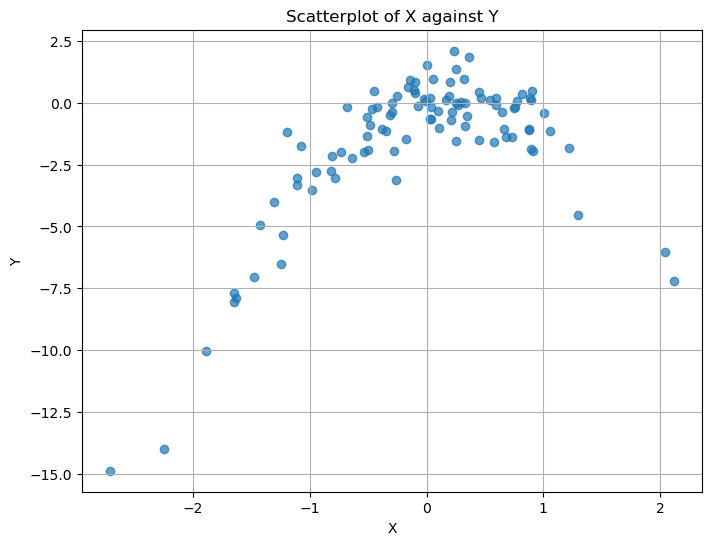

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.title("Scatterplot of X against Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


Your answer:

~~~
The scatterplot of X against Y displays a distinct non-linear relationship between the two variables. The pattern suggests a quadratic relationship, consistent with the underlying model y = x - 2x^2 + ε


~~~

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i.   $Y = \beta_0 + \beta_1X + \epsilon$
ii.  $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$
iii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$
iv.  $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$.

Note you may find it helpful to use the `data.frame()` function
to create a single data set containing both $X$ and $Y$ .


Your code:

In [11]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


data = pd.DataFrame({'X': x, 'Y': y})


data['X2'] = data['X'] ** 2
data['X3'] = data['X'] ** 3
data['X4'] = data['X'] ** 4


models = {
    'Model 1': ['X'],
    'Model 2': ['X', 'X2'],
    'Model 3': ['X', 'X2', 'X3'],
    'Model 4': ['X', 'X2', 'X3', 'X4']
}

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
loocv_errors = {}

for model_name, features in models.items():
    model = LinearRegression()
    scores = cross_val_score(model, data[features], data['Y'], cv=loo, scoring='neg_mean_squared_error')
    loocv_errors[model_name] = -np.mean(scores)

loocv_errors



{'Model 1': 6.633029839181983,
 'Model 2': 1.1229368563419684,
 'Model 3': 1.3017965489358867,
 'Model 4': 1.3323942694179325}

Your answer:

~~~
The error decreases significantly from Model 1 to Model 2, reflecting the importance of including the quadratic term X^2 in the model. This is consistent with the scatterplot observation, which indicated a quadratic relationship.
The increase in error from Model 2 to Model 3 and Model 4 suggests that adding higher-degree terms (cubic and quartic) may lead to overfitting, as these additional terms do not significantly improve the model's predictive capability on new data.

~~~


(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

Your code:

In [12]:

np.random.seed(2)
loocv_errors_new_seed = {}

for model_name, features in models.items():
    model = LinearRegression()
    scores = cross_val_score(model, data[features], data['Y'], cv=loo, scoring='neg_mean_squared_error')
    loocv_errors_new_seed[model_name] = -np.mean(scores)

loocv_errors_new_seed



{'Model 1': 6.633029839181983,
 'Model 2': 1.1229368563419684,
 'Model 3': 1.3017965489358867,
 'Model 4': 1.3323942694179325}

Your answer:

~~~
The results are the same because the random seed only affects the generation of the x and y data. Once the dataset is created, the LOOCV errors depend solely on the data and the models used, not on any random process. 


~~~

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.



Your answer:

~~~
Among the models tested in (c), Model 2  had the smallest Leave-One-Out Cross-Validation (LOOCV) error, approximately 1.12.This result is expected and aligns well with the data's characteristics and the underlying true model. 


~~~


(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?


Your code:

In [13]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

# Function to fit the model and get the summary
def fit_and_summarize_model(data, features):
    X = add_constant(data[features])
    model = OLS(data['Y'], X).fit()
    return model.summary()

# Summaries for each model
model_summaries = {model_name: fit_and_summarize_model(data, features) for model_name, features in models.items()}
model_summaries['Model 1'], model_summaries['Model 2'], model_summaries['Model 3'], model_summaries['Model 4']



(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      Y   R-squared:                       0.318
 Model:                            OLS   Adj. R-squared:                  0.311
 Method:                 Least Squares   F-statistic:                     45.60
 Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.04e-09
 Time:                        14:03:52   Log-Likelihood:                -230.83
 No. Observations:                 100   AIC:                             465.7
 Df Residuals:                      98   BIC:                             470.9
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

Your answer:

~~~
In summary, the statistical significance of the coefficients aligns well with the cross-validation results, reinforcing the conclusion that including the quadratic term (X^2)is crucial while higher-degree terms do not add significant value to the model.


~~~

### Default 1

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

(a) Fit a logistic regression model that uses income and balance to predict default.

Your code:

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


df = pd.read_csv('Default.csv')


df.head()

np.random.seed(42)


X = df[['balance', 'income']]  # Predictor variables
y = df['default'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target variable to binary


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


log_reg = LogisticRegression(solver='liblinear')  # Using liblinear solver for binary classification
log_reg.fit(X_train, y_train)


log_reg.coef_, log_reg.intercept_


(array([[ 0.00047567, -0.00012833]]), array([-1.73691691e-06]))

Your answer:

~~~
The model coefficients for balance and income are approximately 
0.00047567 and -0.00012833 respectively, with an intercept of approximately 
1.73691691*10^6.


~~~


(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

Your code:

In [37]:

y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

accuracy, error_rate


(0.9683333333333334, 0.03166666666666662)

Your answer:

~~~
The logistic regression model achieved an accuracy of approximately 96.83%, resulting in a test error rate of about 3.17%.


~~~

ii. Fit a multiple logistic regression model using only the training observations.

Your code:

In [38]:

df = pd.read_csv('Default.csv')
df['default'] = df['default'].apply(lambda x: 1 if x == 'Yes' else 0)
np.random.seed(42)
X = df[['balance', 'income']]  # Predictor variables
y = df['default']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Accuracy: 0.9683
Error Rate: 0.0317


Your answer:

~~~
Please write your answer in full sentences.


~~~


iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.


Your code:

In [39]:

posterior_probabilities = log_reg.predict_proba(X_test)
probability_of_default = posterior_probabilities[:, 1]
# Classify to default if probability > 0.5
predicted_default_status = (probability_of_default > 0.5).astype(int)

num_classified_as_default = predicted_default_status.sum()
num_classified_as_default


1

Your answer:

~~~
Based on the computed posterior probabilities and using a threshold of 0.5, only 1 individual in the validation set was classified as likely to default (default=1). This result aligns with the prediction step, where individuals are classified into the default category if their posterior probability of default is greater than 0.5.


~~~


iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

Your code:

In [40]:
# Calculate the number of misclassified observations
misclassified = (predicted_default_status != y_test).sum()
total_validation_observations = y_test.shape[0]
validation_set_error = misclassified / total_validation_observations

validation_set_error


0.03166666666666667

Your answer:

~~~
This error rate indicates the proportion of the validation set where the model's predictions did not match the actual default status.


~~~


(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.


Your code:

In [41]:

random_seeds = [0, 100, 200]  
validation_errors = []

for seed in random_seeds:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    log_reg.fit(X_train, y_train)
    predicted_default_status = log_reg.predict(X_test)
    misclassified = (predicted_default_status != y_test).sum()
    validation_set_error = misclassified / y_test.shape[0]
    validation_errors.append(validation_set_error)

validation_errors


[0.038, 0.031, 0.026333333333333334]

Your answer:

~~~
These results highlight the variability in model performance that can arise from different splits of the data into training and validation sets. Such variability underscores the importance of cross-validation for more robustly estimating model performance. 


~~~


(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.


Your code:

In [42]:
# Prepare the data with the student dummy variable
df['student_dummy'] = df['student'].apply(lambda x: 1 if x == 'Yes' else 0)
X_extended = df[['balance', 'income', 'student_dummy']]  # Include 'student' as a dummy variable


validation_errors_extended = []
seed = 42
X_train_ext, X_test_ext, y_train, y_test = train_test_split(X_extended, y, test_size=0.3, random_state=seed)
log_reg.fit(X_train_ext, y_train)

# Predict on the validation set
predicted_default_status_ext = log_reg.predict(X_test_ext)
misclassified_ext = (predicted_default_status_ext != y_test).sum()
validation_set_error_ext = misclassified_ext / y_test.shape[0]

validation_set_error_ext


0.03166666666666667

Your answer:

~~~
 This result suggests that, for the data and model configuration used here, the student status does not significantly contribute to the model's ability to predict default when income and balance are already included as predictors.


~~~

### Default 2

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using the
standard formula for computing the standard errors in the sm.GLM()
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the `summarize()` and `sm.GLM()` functions, determine the
estimated standard errors for the coefficients associated with
income and balance in a multiple logistic regression model that
uses both predictors.
Your code:

In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
df = pd.read_csv('Default.csv')

# Convert 'default' and 'student' to numeric binary formats
df['default_numeric'] = df['default'].apply(lambda x: 1 if x == 'Yes' else 0)
df['student_dummy'] = df['student'].apply(lambda x: 1 if x == 'Yes' else 0)

# Prepare the data for logistic regression model
X = df[['balance', 'income']]  # Predictor variables
X_sm = sm.add_constant(X)  # Adding a constant for the intercept
y_sm = df['default_numeric']  # Target variable

# Fit the logistic regression model using GLM
model = sm.GLM(y_sm, X_sm, family=sm.families.Binomial())
result = model.fit()

# Extract the standard errors for the model coefficients
standard_errors = result.bse

# Display the standard errors
print("Standard errors for the coefficients:")
print(standard_errors)


Standard errors for the coefficients:
const      0.434772
balance    0.000227
income     0.000005
dtype: float64


Your answer:

~~~
These values represent the precision of the coefficient estimates: the smaller the standard error, the more precise the estimate.


~~~


(b) Write a function, `boot_fn()`, that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

Your code:

In [45]:
from sklearn.linear_model import LogisticRegression

def boot_fn(data, index):
    """
    Function to estimate coefficients of a logistic regression model 
    for given indices of the Default data set.
    
    Parameters:
    - data: DataFrame, the Default data set.
    - index: array-like, indices of the observations to use for the model fitting.
    
    Returns:
    - Coefficients for 'balance' and 'income'.
    """
    # Subset the data based on the provided index
    data_subset = data.iloc[index]
    
    # Prepare predictors and target
    X_subset = data_subset[['balance', 'income']]
    y_subset = data_subset['default_numeric']
    
    # Fit the logistic regression model
    model = LogisticRegression(solver='liblinear')  # Using liblinear for small datasets
    model.fit(X_subset, y_subset)
    
   
    return model.coef_[0]  # Coefficients for balance and income


example_index = range(len(df))
boot_fn(df, example_index)


array([ 0.00040756, -0.00012588])

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Following the bootstrap example in the lab, use your `boot_fn()`
function to estimate the standard errors of the logistic regression
coefficients for income and balance.


Your code:

In [46]:
from sklearn.utils import resample

def bootstrap_se(data, boot_fn, n_bootstrap):
    """
    Estimate the standard errors of logistic regression coefficients
    using bootstrap.
    
    Parameters:
    - data: DataFrame, the dataset to bootstrap.
    - boot_fn: function, used to compute the coefficients for a sample.
    - n_bootstrap: int, number of bootstrap samples to generate.
    
    Returns:
    - Estimated standard errors for 'balance' and 'income' coefficients.
    """
    # Initialize an array to store the bootstrap coefficient estimates
    coef_estimates = np.zeros((n_bootstrap, 2))  # 2 for balance and income
    
    # Perform bootstrap sampling and estimation
    for i in range(n_bootstrap):
        # Generate a bootstrap sample: sample with replacement
        bootstrap_sample = resample(data.index)
        # Calculate coefficients for this sample
        coef_estimates[i] = boot_fn(data, bootstrap_sample)
    
    # Calculate standard errors (std deviation of the bootstrap estimates)
    se_estimates = np.std(coef_estimates, axis=0)
    
    return se_estimates


np.random.seed(42)


n_bootstrap_samples = 1000
bootstrap_standard_errors = bootstrap_se(df, boot_fn, n_bootstrap_samples)

bootstrap_standard_errors


array([7.07866515e-05, 3.95618514e-06])

Your answer:

~~~
For balance: 7.07866515e-05
 
For income: 3.95618514e-06


~~~


(d) Comment on the estimated standard errors obtained using the `sm.GLM()` function and using the bootstrap.

Your answer:

~~~
The standard errors estimated via the bootstrap method are smaller for both coefficients compared to those obtained from the sm.GLM() function. This difference suggests that the bootstrap method may provide a tighter confidence interval for these estimates, indicating potentially less variability in the coefficient estimates across different samples of the data.
The choice between these two methods for estimating standard errors might depend on the context of the analysis and the specific characteristics of the data. The bootstrap method's empirical nature makes it versatile and robust.


~~~

### Boston housing data set

We will now consider the Boston housing data set, from the ISLR library.

In [24]:
Boston = load_data("Boston")




(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.

Your code:

In [47]:



mu_hat = Boston['medv'].mean()

mu_hat


22.532806324110677

Your answer:

~~~
The estimated population mean of medv (median value of owner-occupied homes in $1000s) is approximately $\hat{\mu} = 22.53$. 


~~~


(b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.
Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

Your code:

In [48]:

n = Boston['medv'].count()  
std_dev = Boston['medv'].std() 


se_mu_hat = std_dev / np.sqrt(n)

se_mu_hat


0.4088611474975351

Your answer:

~~~
This value represents the standard deviation of the sampling distribution of the sample mean. In other words, it provides a measure of how much we expect the sample mean to vary from sample to sample if we were to repeatedly draw samples of the same size from the population.


~~~


(c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

Your code:

In [53]:
# Define a function for bootstrap sampling
def bootstrap_mean(data, n_bootstrap):
    np.random.seed(42) 
    bootstrap_means = np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means


n_bootstrap_samples = 1000
bootstrap_means = bootstrap_mean(Boston['medv'], n_bootstrap_samples)
bootstrap_se_mu_hat = np.std(bootstrap_means)

bootstrap_se_mu_hat


0.39688532048705005

Your answer:

~~~
The estimated standard error of the mean of medv, using the bootstrap approach with 1000 bootstrap samples, is approximately 0.397. This estimate is slightly lower than the standard error calculated directly from the sample in part (b), which was approximately 0.409



~~~

(d) Based on your bootstrap estimate from (c), provide a 95 % confidence
interval for the mean of medv. Compare it to the results
obtained by using `Boston['medv'].std()` and the two standard
error rule (3.9).
Hint: You can approximate a 95% confidence interval using the formula $[\hat{\mu} − 2SE(\hat{\mu}), \hat{\mu} + 2SE(\hat{\mu})]$.

Your code:

In [50]:
# Calculate the 95% confidence interval based on the bootstrap standard error
ci_lower = mu_hat - 2 * bootstrap_se_mu_hat
ci_upper = mu_hat + 2 * bootstrap_se_mu_hat

(ci_lower, ci_upper)


(21.739035683136578, 23.326576965084776)

Your answer:

~~~
we see that both approaches yield similar confidence intervals. This similarity confirms the consistency and reliability of the bootstrap method as an alternative to traditional statistical formulas for estimating confidence intervals,


~~~


(e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median value of medv in the population.

Your code:

In [52]:

# Estimate for the population median of medv
mu_med_hat = Boston['medv'].median()

mu_med_hat


21.2

Your answer:

~~~
 indicating that half of the owner-occupied homes have a median value below $21,200 and half have a value above.


~~~


(f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

Your code:

In [54]:
def bootstrap_median(data, n_bootstrap):
    np.random.seed(42)  # Ensure reproducibility
    bootstrap_medians = np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_medians[i] = np.median(bootstrap_sample)
    return bootstrap_medians

# Estimate the standard error of mu_med_hat using the bootstrap
bootstrap_medians = bootstrap_median(Boston['medv'], n_bootstrap_samples)
bootstrap_se_mu_med_hat = np.std(bootstrap_medians)

bootstrap_se_mu_med_hat


0.36046919424549967

Your answer:

~~~
The estimated standard error of "mu", using the bootstrap approach , is approximately 0.360. This value indicates the variability of the median estimate across different bootstrap samples, demonstrating the bootstrap's utility in quantifying uncertainty for statistics where traditional formulas are not applicable


~~~



(g) Based on this data set, provide an estimate for the tenth percentile
of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$.
(You can use the `np.percentile()` function.)

Your code:

In [55]:
mu_01_hat = np.percentile(Boston['medv'], 10)

mu_01_hat


12.75

Your answer:

~~~
This indicates that 10% of the owner-occupied homes in Boston have a median value below $12,750.


~~~


(h) Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

Your code:

In [56]:
def bootstrap_percentile(data, n_bootstrap, percentile):
    np.random.seed(42)  # Ensure reproducibility
    bootstrap_percentiles = np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_percentiles[i] = np.percentile(bootstrap_sample, percentile)
    return bootstrap_percentiles

bootstrap_percentiles = bootstrap_percentile(Boston['medv'], n_bootstrap_samples, 10)
bootstrap_se_mu_01_hat = np.std(bootstrap_percentiles)

bootstrap_se_mu_01_hat


0.4987046821516718

Your answer:

~~~
The estimated standard error of "mu _0.1" using the bootstrap is approximately 0.499. This suggests more variability in the estimate of the lower end of the medv distribution across different bootstrap samples.


~~~

## Additional Material

### Cross Validation for Predictive Modeling Platforms in Python

#### scikit-learn

Using platforms like scikit-learn is helpful for things such as cross validation.
There are variants of CV implemented to be used off the shelf
https://scikit-learn.org/stable/modules/cross_validation.html

There are many metrics you can choose from
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [33]:
ames_raw_comp=ames_raw.loc[:,["SalePrice","Gr Liv Area","Lot Area","Total Bsmt SF"]].dropna()
X=ames_raw_comp.loc[:,["Gr Liv Area","Lot Area","Total Bsmt SF"]]
y=ames_raw_comp.loc[:,"SalePrice"]
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import svm
from sklearn.linear_model import LinearRegression
clf =  LinearRegression()
## One metric
scores = cross_val_score(clf, X, y, cv=5,scoring="r2")
## Multiple metrics
scoring = ['r2', 'max_error']
scores = cross_validate(clf, X, y, scoring=scoring)

#### PySpark

[Apache Spark](https://spark.apache.org/docs/3.1.3/api/python/index.html) is a popular large data handling platform.  Over the years, they built Machine Learning capabilities in MLlib.

In [34]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
import tempfile

ModuleNotFoundError: No module named 'pyspark'

In [ ]:
spark = SparkSession.builder.appName("CV_test").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/11 21:04:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
dataset = spark.createDataFrame(
    [(Vectors.dense([0.0]), 0.0),
     (Vectors.dense([0.4]), 1.0),
     (Vectors.dense([0.5]), 0.0),
     (Vectors.dense([0.6]), 1.0),
     (Vectors.dense([1.0]), 1.0)] * 10,
    ["features", "label"])
lr = LogisticRegression()
grid = ParamGridBuilder().addGrid(lr.maxIter, [0, 1]).build()
evaluator = BinaryClassificationEvaluator()
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid, evaluator=evaluator,
    parallelism=2)
cvModel = cv.fit(dataset)
cvModel.getNumFolds()
cvModel.avgMetrics[0]
evaluator.evaluate(cvModel.transform(dataset))

24/01/11 21:04:28 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


0.8333333333333333

In [ ]:
spark.stop()

#### Resampling  using h2o

On H2O cross validation is embedded in the function calling so you don't need to worry about learning a new wrapper on top of your estimator.
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html

In [ ]:
#pip install requests
#pip install tabulate
#pip uninstall h2o
#pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
# load packages and data
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

##### Starting H2O

To use H2O you need to instantiate it.

In [ ]:
# nthreads specifies number of threads. -1 means use all the CPU cores.
# max_mem_size specifies the maximum amount of RAM to use.
localH2O= h2o.init(nthreads = -1, max_mem_size="4g")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /opt/homebrew/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb
  JVM stdout: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb/h2o_masanaoyajima_started_from_python.out
  JVM stderr: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb/h2o_masanaoyajima_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_masanaoyajima_gs7xs1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.529 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


##### CV with  H2O

In [ ]:
# Import the prostate dataset
prostate = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/prostate/prostate.csv.zip")

# Set the predictor names and the response column name
response = "CAPSULE"
predictors = prostate.names[3:8]

# Convert the response column to a factor
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

# Train a GBM model setting nfolds to 5
prostate_gbm = H2OGeneralizedLinearEstimator(nfolds = 5, seed = 1)
prostate_gbm.train(x=predictors, y=response, training_frame=prostate)

# AUC of cross-validated holdout predictions
prostate_gbm.auc(xval=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


0.7790697716207187

##### Shut down H2O

In [ ]:
h2o.cluster().shutdown(prompt =False)

H2O session _sid_8dc7 closed.
